## Hardness analysis

$\texttt{Colosseum}$ implements the analysis of hardness for the three scenarios described in the paper with three simple functions.
It is also possible to easily calculate the measures for specific MDP instance.
<br>
**N.B.** These functionalities are available for the eight MDPs implemented in $\texttt{Colosseum}$ as well as customly specified MDPs using the *Custom* class.

In [1]:
from colosseum import config
import seaborn as sns
import numpy as np
from scipy.stats import beta

from colosseum.mdp.custom_mdp import CustomEpisodic
from colosseum.mdp.minigrid_empty import MiniGridEmptyContinuous
from colosseum.mdp.river_swim import RiverSwimEpisodic
from colosseum.hardness.analysis.utils import HardnessAnalysisParams, plot_hardness_analysis

config.disable_multiprocessing()

hap = HardnessAnalysisParams(
    mdp_base_params=dict(make_reward_stochastic=True, size=10),
    sizes=np.linspace(5, 20, 6).astype(int),
    ps=np.linspace(0.0001, 0.6, 8),
    n_seeds=5,
)

/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### Varying the number of states

RiverSwimEpisodic for varying size.: 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]


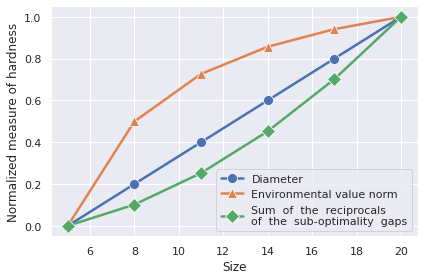

In [2]:
plot_hardness_analysis(
    "size",
    hap.sizes,
    RiverSwimEpisodic,
    hap.mdp_base_params,
    n_seeds=hap.n_seeds,
)

### Varying the probability of action not being executed

RiverSwimEpisodic for varying p_lazy.: 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]


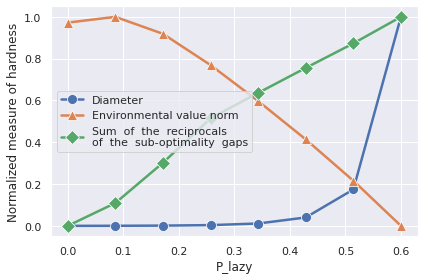

In [3]:
plot_hardness_analysis(
    "p_lazy",
    hap.ps,
    RiverSwimEpisodic,
    hap.mdp_base_params,
    n_seeds=hap.n_seeds,
)

### Varying the probability of action being replaced by a random one

RiverSwimEpisodic for varying p_rand.: 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]


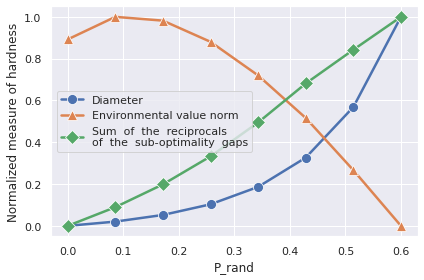

In [4]:
plot_hardness_analysis(
    "p_rand",
    hap.ps,
    RiverSwimEpisodic,
    hap.mdp_base_params,
    n_seeds=hap.n_seeds,
)

### $\texttt{Custom}$ MDP hardness

In [5]:
num_states = 4
num_actions = 2
T = [
    [[0.0, 1.00, 0.00, 0.0], [0.0, 0.0, 1.0, 0.0]],
    [[0.0, 0.00, 0.50, 0.5], [0.0, 0.8, 0.1, 0.1]],
    [[0.0, 0.50, 0.00, 0.5], [0.0, 0.1, 0.8, 0.1]],
    [[0.5, 0.25, 0.25, 0.0], [0.1, 0.1, 0.1, 0.7]],
]
np.random.seed(42)
R = {
    (s, a): beta(np.random.uniform(0, 30), np.random.uniform(0, 30))
    for s in range(num_states)
    for a in range(num_actions)
}
# R = np.random.randn(num_states, num_actions)  (FOR DETERMINISTIC REWARDS)
T_0 = {0: 1.0}
mdp = CustomEpisodic(
    seed=42,
    T_0=T_0,
    T=np.array(T).astype(np.float32),
    R=R
)

print(mdp.measures_of_hardness)
print(mdp.communication_class)

{'diameter': 5.9993896484375, 'suboptimal_gaps': 72.12064, 'value_norm': 0.18514434}


/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/networkx/convert_matrix.py:685: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  DeprecationWarning,


MDPCommunicationClass.ERGODIC


/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/networkx/convert_matrix.py:685: DeprecationWarning: from_numpy_matrix is deprecated and will be removed in NetworkX 3.0.
Use from_numpy_array instead, e.g. from_numpy_array(A, **kwargs)
  DeprecationWarning,
